In [4]:
import pandas as pd
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

from data_utils import load_datasets

In [5]:
train_set, train_loader, test_set, test_loader = load_datasets(return_df=False)

FileNotFoundError: [Errno 2] No such file or directory: '/home/yandex/DL20232024a/asafavrahamy/Projects/RefRec/data/ml-1m/proc_data/bert_avg_augment.hist'

In [3]:
train_set[0]

{'iid': tensor(1602),
 'aid': tensor([13]),
 'lb': tensor(1),
 'hist_iid_seq': tensor([1540,   73,  179,  180,   93]),
 'hist_aid_seq': tensor([[4],
         [5],
         [4],
         [4],
         [4]]),
 'hist_rate_seq': tensor([4, 4, 3, 4, 4]),
 'hist_seq_len': tensor(5),
 'item_aug_vec': tensor([-2.4902e-01,  1.8579e-01,  9.1797e-02, -2.3291e-01,  5.2148e-01,
         -6.6040e-02,  2.5171e-01,  2.7686e-01,  1.8530e-01, -4.9530e-02,
         -1.3635e-01, -1.6382e-01, -2.5940e-02,  6.0303e-01,  1.0291e-01,
          5.9766e-01,  4.2920e-01, -1.4343e-01, -2.8589e-01,  8.1726e-02,
          1.1725e-01, -1.6370e-01, -2.6428e-02,  8.1592e-01,  2.9224e-01,
          4.1626e-01, -2.3169e-01, -1.1328e-01, -2.4097e-01,  1.0919e-01,
          4.3481e-01, -9.5520e-02, -3.3228e-01, -3.0298e-01, -1.2451e-01,
         -8.8562e-02, -8.9233e-02, -2.7051e-01,  3.9093e-02,  1.8457e-01,
         -4.2920e-01, -4.0796e-01,  6.4331e-02, -1.4587e-01,  5.4413e-02,
         -3.2104e-01,  2.7417e-01,  9.86

In [5]:
df_train = pd.read_csv('df_train_all.csv')
df_train['user_idx'].value_counts()

user_idx
4995    1820
1178    1713
1644    1565
3722    1491
1325    1488
        ... 
2881      10
5100      10
5139      10
3959      10
4130      10
Name: count, Length: 5436, dtype: int64

In [ ]:
df_train_user = df_train[df_train['user_idx'] == 5879]
df_train_user

In [2]:
df_train, train_set, train_loader, df_test, test_set, test_loader = load_datasets()

100%|██████████| 92024/92024 [01:02<00:00, 1461.68it/s]


In [16]:
sampled_user_idx = df_train['user_idx'].sample(500, random_state=42)
print(list(sampled_user_idx))


[896, 2215, 3561, 3196, 5827, 2041, 2871, 594, 4709, 3798, 2574, 5796, 2412, 2362, 3685, 1490, 5308, 5835, 5037, 1418, 1065, 2041, 4614, 5276, 5898, 5702, 5342, 4059, 2716, 2460, 3051, 1404, 5147, 3876, 2512, 4510, 1503, 4913, 4242, 3815, 802, 1496, 4695, 5825, 4340, 2155, 3079, 3188, 5060, 2467, 2441, 5017, 4717, 4326, 785, 788, 2140, 4643, 741, 5617, 4586, 3374, 4029, 1476, 4728, 4331, 4511, 1932, 4333, 1804, 3873, 2251, 475, 5673, 100, 2895, 191, 4604, 4924, 5621, 2009, 5962, 483, 1053, 2409, 1162, 3811, 2481, 4481, 2694, 536, 4445, 2372, 1333, 2449, 1705, 1163, 4361, 3125, 1039, 2506, 1563, 203, 5653, 5547, 2024, 5574, 4067, 1702, 1126, 109, 741, 4327, 41, 5230, 1483, 99, 1492, 1667, 3983, 5723, 3327, 1835, 2905, 1042, 5648, 5995, 5090, 59, 4125, 1559, 4620, 3582, 5315, 3658, 2953, 1416, 3517, 1178, 5379, 3050, 2273, 4036, 5695, 3934, 2324, 3022, 2982, 3886, 2034, 1320, 1161, 3398, 1644, 5192, 5229, 1304, 4872, 5021, 5387, 1689, 5428, 211, 5551, 1613, 5955, 4857, 2785, 4259, 3512, 

In [17]:
# Check for overlap in user_idx between train and test datasets
overlap_user_idx = set(df_train['user_idx']).intersection(set(df_test['user_idx']))
print("Overlap User Indices:", overlap_user_idx)

overlap_user_idx = set(df_train['user_key']).intersection(set(df_test['user_key']))
print("Overlap User Indices:", overlap_user_idx)


Overlap User Indices: set()


Overlap User Indices: set()


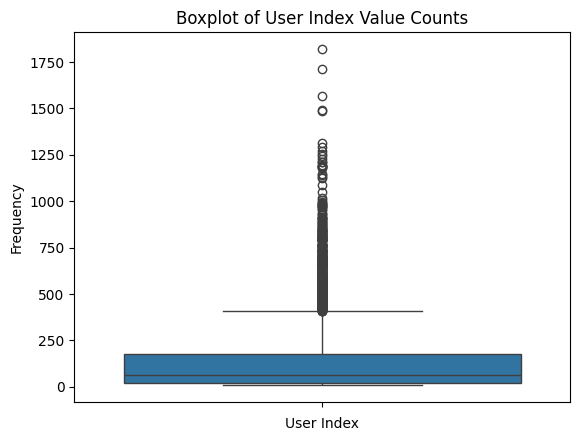

In [13]:
df_train['user_idx'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the boxplot for 'user_idx' value counts
sns.boxplot(df_train['user_idx'].value_counts())
plt.title('Boxplot of User Index Value Counts')
plt.xlabel('User Index')
plt.ylabel('Frequency')
plt.show()


In [2]:
llm = ChatGroq(temperature=0, model="llama3-70b-8192")

In [3]:
df_train = pd.read_csv('df_train.csv')
df_train.shape

(1460, 12)

In [2]:
df_test = pd.read_csv('df_test.csv')
df_test.head()

,test_index,user_idx,user_key,user_hist,item_idx,item_key,item_desc,user_prompt,item_prompt,labels,preds,new_user_prompt,preds_llama3,preds_llama3_retrain
0,0,1460,1131,"Given a male user who is aged 56+ and retired,...",948,959,Of Human Bondage is a drama film directed by J...,"Given a male user who is aged 56+ and retired,...",Introduce movie Of Human Bondage (1934) and de...,1,0.881885,"Given a male user who is aged 56+ and retired,...",0.869767,0.608741
1,1,1460,1131,"Given a male user who is aged 56+ and retired,...",3181,3246,Malcolm X is a biographical drama film release...,"Given a male user who is aged 56+ and retired,...",Introduce movie Malcolm X (1992) and describe ...,1,0.886062,"Given a male user who is aged 56+ and retired,...",0.875437,0.612334
2,2,1460,1131,"Given a male user who is aged 56+ and retired,...",1602,1649,"Fast, Cheap & Out of Control is a documentary ...","Given a male user who is aged 56+ and retired,...","Introduce movie Fast, Cheap & Out of Control (...",1,0.846270,"Given a male user who is aged 56+ and retired,...",0.833210,0.554016
3,3,1460,1131,"Given a male user who is aged 56+ and retired,...",2542,2612,"""Mildred Pierce"" is a classic film noir drama ...","Given a male user who is aged 56+ and retired,...",Introduce movie Mildred Pierce (1945) and desc...,1,0.915424,"Given a male user who is aged 56+ and retired,...",0.907706,0.617586
4,4,1460,1131,"Given a male user who is aged 56+ and retired,...",3365,3435,Double Indemnity is a classic film noir from 1...,"Given a male user who is aged 56+ and retired,...",Introduce movie Double Indemnity (1944) and de...,1,0.948779,"Given a male user who is aged 56+ and retired,...",0.946313,0.537171


AUC for preds: 0.8376173999011369
AUC for preds_llama3: 0.8235294117647058
AUC for preds_llama3_retrain: 0.6114681166584282


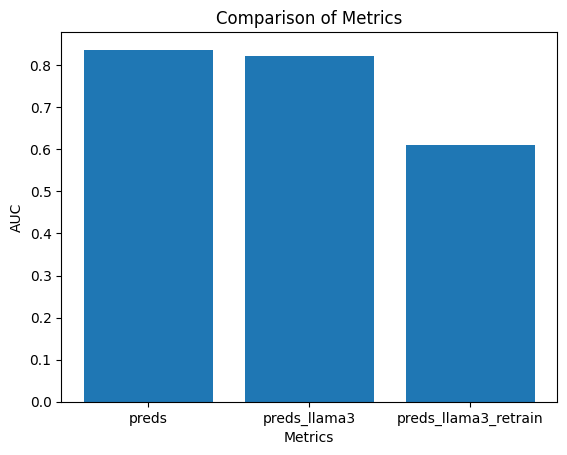

In [4]:
import matplotlib.pyplot as plt

# Create a list of metric names
metrics = ['preds', 'preds_llama3', 'preds_llama3_retrain']
from sklearn.metrics import roc_auc_score

# Calculate AUC for preds
auc_preds = roc_auc_score(df_test['labels'], df_test['preds'])
print(f"AUC for preds: {auc_preds}")

# Calculate AUC for preds_llama3
auc_preds_llama3 = roc_auc_score(df_test['labels'], df_test['preds_llama3'])
print(f"AUC for preds_llama3: {auc_preds_llama3}")

# Calculate AUC for preds_llama3_retrain
auc_preds_llama3_retrain = roc_auc_score(df_test['labels'], df_test['preds_llama3_retrain'])
print(f"AUC for preds_llama3_retrain: {auc_preds_llama3_retrain}")

# Create a list of metric values
values = [auc_preds, auc_preds_llama3, auc_preds_llama3_retrain]

# Plot the bar chart
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('AUC')
plt.title('Comparison of Metrics')
plt.show()

In [15]:
import pandas as pd

# Assuming df_test is already loaded and contains the columns 'labels' and 'preds_llama3_retrain'
df_test['difference'] = (df_test['labels'] - df_test['preds_llama3_retrain']).abs()

# Filter to focus on large differences
threshold = 0.5  # Define a threshold for 'big differences'
significant_diffs = df_test[df_test['difference'] > threshold]

# Create a dictionary to accumulate prompts for each user_idx
user_prompts = {}

for index, row in significant_diffs.iterrows():
    user_idx = row['user_idx']
    if user_idx not in user_prompts:
        user_prompts[user_idx] = "Reflect on the following cases where there were significant discrepancies between the actual labels and the predictions for your user index:\n"
    user_prompts[user_idx] += f"- The actual label was {row['labels']:.2f} while the predicted probability was {row['preds_llama3_retrain']:.2f}. The difference of {row['difference']:.2f} indicates a significant prediction error.\n"

# Example of how to use these prompts with the llm
for user_idx, prompt in user_prompts.items():
    print(f"Prompt for user_idx {user_idx}:\n{prompt}\n")
    # Assuming llm is an instance of ChatGroq
    response = llm.invoke(prompt)
    print(f"Response for user_idx {user_idx}:\n{response}\n")
    break

Prompt for user_idx 1460:
Reflect on the following cases where there were significant discrepancies between the actual labels and the predictions for your user index:
- The actual label was 1.00 while the predicted probability was 0.48. The difference of 0.52 indicates a significant prediction error.
- The actual label was 1.00 while the predicted probability was 0.48. The difference of 0.52 indicates a significant prediction error.
- The actual label was 1.00 while the predicted probability was 0.47. The difference of 0.53 indicates a significant prediction error.
- The actual label was 1.00 while the predicted probability was 0.49. The difference of 0.51 indicates a significant prediction error.
- The actual label was 1.00 while the predicted probability was 0.48. The difference of 0.52 indicates a significant prediction error.
- The actual label was 0.00 while the predicted probability was 0.52. The difference of 0.52 indicates a significant prediction error.
- The actual label was 

In [3]:
# Prompt 
system = """You are an expert at routing a user question to a vectorstore or web search.
The vectorstore contains documents related to agents, prompt engineering, and adversarial attacks.
Use the vectorstore for questions on these topics. Otherwise, use web-search."""

In [4]:
llm.invoke(system)



AIMessage(content="I'm ready to help. What's your question?", response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 60, 'total_tokens': 71, 'completion_time': 0.030259761, 'prompt_time': 0.012266699, 'queue_time': None, 'total_time': 0.04252646}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'stop', 'logprobs': None}, id='run-df380f3a-8f21-4332-9d9b-d04f4cd6c2dd-0')

,test_index,user_idx,user_key,user_hist,item_idx,item_key,item_desc,user_prompt,item_prompt,labels,preds,new_user_prompt,preds_llama3,preds_llama3_retrain
0,0,1460,1131,"Given a male user who is aged 56+ and retired,...",948,959,Of Human Bondage is a drama film directed by J...,"Given a male user who is aged 56+ and retired,...",Introduce movie Of Human Bondage (1934) and de...,1,0.881885,"Given a male user who is aged 56+ and retired,...",0.869767,0.606020
1,1,1460,1131,"Given a male user who is aged 56+ and retired,...",3181,3246,Malcolm X is a biographical drama film release...,"Given a male user who is aged 56+ and retired,...",Introduce movie Malcolm X (1992) and describe ...,1,0.886062,"Given a male user who is aged 56+ and retired,...",0.875437,0.600829
2,2,1460,1131,"Given a male user who is aged 56+ and retired,...",1602,1649,"Fast, Cheap & Out of Control is a documentary ...","Given a male user who is aged 56+ and retired,...","Introduce movie Fast, Cheap & Out of Control (...",1,0.846270,"Given a male user who is aged 56+ and retired,...",0.833210,0.507870
3,3,1460,1131,"Given a male user who is aged 56+ and retired,...",2542,2612,"""Mildred Pierce"" is a classic film noir drama ...","Given a male user who is aged 56+ and retired,...",Introduce movie Mildred Pierce (1945) and desc...,1,0.915424,"Given a male user who is aged 56+ and retired,...",0.907706,0.584807
4,4,1460,1131,"Given a male user who is aged 56+ and retired,...",3365,3435,Double Indemnity is a classic film noir from 1...,"Given a male user who is aged 56+ and retired,...",Introduce movie Double Indemnity (1944) and de...,1,0.948779,"Given a male user who is aged 56+ and retired,...",0.946313,0.580385


In [5]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Calculate AUC for preds
auc_preds = roc_auc_score(df_test['labels'], df_test['preds'])
print(f"AUC for preds: {auc_preds}")

# Calculate accuracy for preds
accuracy_preds = accuracy_score(df_test['labels'], df_test['preds'].round())
print(f"Accuracy for preds: {accuracy_preds}")

# Calculate AUC for preds_llama3
auc_preds_llama3 = roc_auc_score(df_test['labels'], df_test['preds_llama3'])
print(f"AUC for preds_llama3: {auc_preds_llama3}")

# Calculate accuracy for preds_llama3
accuracy_preds_llama3 = accuracy_score(df_test['labels'], df_test['preds_llama3'].round())
print(f"Accuracy for preds_llama3: {accuracy_preds_llama3}")

# Calculate AUC for preds_llama3_retrain
auc_preds_llama3_retrain = roc_auc_score(df_test['labels'], df_test['preds_llama3_retrain'])
print(f"AUC for preds_llama3_retrain: {auc_preds_llama3_retrain}")

# Calculate accuracy for preds_llama3_retrain
accuracy_preds_llama3_retrain = accuracy_score(df_test['labels'], df_test['preds_llama3_retrain'].round())
print(f"Accuracy for preds_llama3_retrain: {accuracy_preds_llama3_retrain}")


AUC for preds: 0.8376173999011369
Accuracy for preds: 0.803921568627451
AUC for preds_llama3: 0.8235294117647058
Accuracy for preds_llama3: 0.8104575163398693
AUC for preds_llama3_retrain: 0.7434503213049926
Accuracy for preds_llama3_retrain: 0.738562091503268
